###**Instalar.**

In [ ]:
# Instalar el conector MySQL
!pip install mysql-connector-python

###**Importar librerias y conectarse a la base de datos de MySQL**

In [ ]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [ ]:
# Conectar a la base de datos MySQL
conn = mysql.connector.connect(
    host='*********rds.amazonaws.com',
    user='***********',
    password='*********',
    database='Formula1DB'
)

# Crear un cursor
cursor = conn.cursor()

# Ejecutar una consulta para verificar los primeros 10 registros
cursor.execute("SELECT * FROM drivers ORDER BY driverId LIMIT 10")

# Obtener los resultados de la consulta
rows = cursor.fetchall()

# Mostrar los resultados
for row in rows:
    print(row)


(1, 'hamilton', 44, 'HAM', 'Lewis', 'Hamilton', datetime.date(1985, 1, 7), 'British', 'http://en.wikipedia.org/wiki/Lewis_Hamilton')
(2, 'heidfeld', 0, 'HEI', 'Nick', 'Heidfeld', datetime.date(1977, 5, 10), 'German', 'http://en.wikipedia.org/wiki/Nick_Heidfeld')
(3, 'rosberg', 6, 'ROS', 'Nico', 'Rosberg', datetime.date(1985, 6, 27), 'German', 'http://en.wikipedia.org/wiki/Nico_Rosberg')
(4, 'alonso', 14, 'ALO', 'Fernando', 'Alonso', datetime.date(1981, 7, 29), 'Spanish', 'http://en.wikipedia.org/wiki/Fernando_Alonso')
(5, 'kovalainen', 0, 'KOV', 'Heikki', 'Kovalainen', datetime.date(1981, 10, 19), 'Finnish', 'http://en.wikipedia.org/wiki/Heikki_Kovalainen')
(6, 'nakajima', 0, 'NAK', 'Kazuki', 'Nakajima', datetime.date(1985, 1, 11), 'Japanese', 'http://en.wikipedia.org/wiki/Kazuki_Nakajima')
(7, 'bourdais', None, 'BOU', 'S̩bastien', 'Bourdais', datetime.date(1979, 2, 28), 'French', 'http://en.wikipedia.org/wiki/S%C3%A9bastien_Bourdais')
(8, 'raikkonen', 7, 'RAI', 'Kimi', 'Räikkönen', da

### **Consultas**

In [ ]:
# obtener las tablas ordenadas por nombre
query = """
SELECT
    TABLE_NAME,
    TABLE_TYPE,
    TABLE_ROWS
FROM information_schema.tables
WHERE table_schema = 'Formula1DB'
ORDER BY TABLE_NAME
"""

# Ejecutar la consulta y obtener los resultados directamente en un DataFrame
tables = pd.read_sql(query, conn)

# Mostrar el DataFrame con solo las columnas esenciales
tables

<ipython-input-4-dc0de3cc469c>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql(query, conn)


,TABLE_NAME,TABLE_TYPE,TABLE_ROWS
0,circuits,BASE TABLE,73
1,constructors,BASE TABLE,208
2,drivers,BASE TABLE,842
3,races,BASE TABLE,997
4,results,BASE TABLE,23727
5,results_log,BASE TABLE,4
6,users,BASE TABLE,3


In [ ]:
# Verificar los datos existentes
cursor.execute("SELECT forename, surname, nationality FROM drivers WHERE forename = 'Sbastien' AND surname = 'Bourdais';")
existing_driver = cursor.fetchall()
print(existing_driver)

[('S̩bastien', 'Bourdais', 'French')]


In [ ]:
# Actualizar la nacionalidad de Sébastien Bourdais
update_query = """
    UPDATE drivers
    SET nationality = 'Belgian'
    WHERE forename = 'S̩bastien' AND surname = 'Bourdais';
"""

# Ejecutar la consulta
cursor.execute(update_query)

# Confirmar los cambios
conn.commit()

# Verificar la actualización
cursor.execute("SELECT forename, surname, nationality FROM drivers WHERE forename = 'S̩bastien' AND surname = 'Bourdais';")
updated_driver = cursor.fetchall()
print(updated_driver)

[('S̩bastien', 'Bourdais', 'Belgian')]


In [ ]:
# Buscar a los pilotos llamados "Sébastien"
find_sebastian_query = """
    SELECT driverId, forename
    FROM drivers
    WHERE forename = 'Sbastien';
"""

# Ejecutar la consulta
cursor.execute(find_sebastian_query)
sebastian_drivers = cursor.fetchall()
print(sebastian_drivers)

[(7, 'S̩bastien'), (67, 'S̩bastien')]


In [ ]:
# Eliminar los resultados relacionados con el driverId = 7
delete_related_results_query = """
    DELETE FROM results
    WHERE driverId = 7;
"""

# Ejecutar la consulta
cursor.execute(delete_related_results_query)

# Confirmar que la eliminación de los resultados relacionados se ha realizado
conn.commit()

# Ahora eliminar al piloto con driverId = 7
delete_driver_query = """
    DELETE FROM drivers
    WHERE driverId = 7;
"""

# Ejecutar la consulta
cursor.execute(delete_driver_query)

# Confirmar que la eliminación del piloto se ha realizado
conn.commit()

# Verificar que solo queda un piloto 'S̩bastien'
verify_query = """
    SELECT forename
    FROM drivers
    WHERE forename = 'Sbastien';
"""

# Ejecutar la consulta para verificar
cursor.execute(verify_query)
remaining_sebastian = cursor.fetchall()
print(remaining_sebastian)  # Debería devolver el nombre del piloto con driverId 67

[('S̩bastien',)]


**Reinserción del Registro con driverId = 7:**

Para asegurar la integridad de los datos y permitir la continuación de las consultas siguientes, se ha procedido a reinsertar el registro con driverId = 7. Esta acción se lleva a cabo después de las pruebas anteriores que incluyeron operaciones de UPDATE y DELETE, las cuales resultaron en la eliminación del registro. La reinserción garantiza que los datos estén completos y disponibles para futuras consultas, evitando errores y asegurando la consistencia de la base de datos.

In [ ]:
# Preparar la consulta de inserción
query = """
INSERT INTO drivers (driverId, driverRef, number, code, forename, surname, dob, nationality, url)
VALUES (7, 'bourdais', NULL, 'BOU', 'S̩bastien', 'Bourdais', '1979-02-28', 'French', 'http://en.wikipedia.org/wiki/S%C3%A9bastien_Bourdais')
"""

try:
    # Ejecutar la consulta
    cursor.execute(query)
    # Confirmar los cambios
    conn.commit()
    print("Registro con driverId 7 reinsertado exitosamente.")
except mysql.connector.Error as err:
    print(f"Error: {err}")

Registro con driverId 7 reinsertado exitosamente.


**Recuperar todos los datos de la tabla circuits y mostrarlos en un DataFrame.**



In [ ]:
# Obtener todos los registros de la tabla circuits y cargarlos en un DataFrame
circuits_df = pd.read_sql("""
SELECT *
FROM circuits;
""", conn)
circuits_df

<ipython-input-10-8c90432a8bda>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  circuits_df = pd.read_sql("""


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,0,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,0,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÃ_,Spain,41.57000,2.26111,0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,0,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
68,69,americas,Circuit of the Americas,Austin,USA,30.13280,-97.64110,0,http://en.wikipedia.org/wiki/Circuit_of_the_Am...
69,70,red_bull_ring,Red Bull Ring,Spielburg,Austria,47.21970,14.76470,0,http://en.wikipedia.org/wiki/Red_Bull_Ring
70,71,sochi,Sochi Autodrom,Sochi,Russia,43.40570,39.95780,0,http://en.wikipedia.org/wiki/Sochi_Autodrom
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.77690,-74.01110,0,http://en.wikipedia.org/wiki/Port_Imperial_Str...



**Consultar todos los datos de la tabla drivers y ordenar por apellido.**



In [ ]:
# Consultar todos los datos de la tabla Drivers y ordenarlos por apellido
drivers_df = pd.read_sql("""
SELECT *
FROM drivers
ORDER BY surname;
""", conn)
drivers_df

<ipython-input-11-6ba5adba7817>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drivers_df = pd.read_sql("""


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,446,abate,0.0,,Carlo,Abate,1932-07-10,Italian,http://en.wikipedia.org/wiki/Carlo_Mario_Abate
1,725,abecassis,0.0,,George,Abecassis,1913-03-21,British,http://en.wikipedia.org/wiki/George_Abecassis
2,186,acheson,0.0,,Kenny,Acheson,1957-11-27,British,http://en.wikipedia.org/wiki/Kenny_Acheson
3,113,adams,0.0,,Philippe,Adams,1969-11-19,Belgian,http://en.wikipedia.org/wiki/Philippe_Adams
4,796,ader,0.0,,Walt,Ader,1913-12-15,American,http://en.wikipedia.org/wiki/Walt_Ader
...,...,...,...,...,...,...,...,...,...
837,279,zapico,0.0,,Emilio,Zapico,1944-05-27,Spanish,http://en.wikipedia.org/wiki/Emilio_Zapico
838,41,zonta,0.0,ZON,Ricardo,Zonta,1976-03-23,Brazilian,http://en.wikipedia.org/wiki/Ricardo_Zonta
839,254,zorzi,0.0,,Renzo,Zorzi,1946-12-12,Italian,http://en.wikipedia.org/wiki/Renzo_Zorzi
840,217,zunino,0.0,,Ricardo,Zunino,1949-04-13,Argentine,http://en.wikipedia.org/wiki/Ricardo_Zunino




**Consultar todos los datos de la tabla drivers junto con los resultados y ordenar por nombre**


In [ ]:
# Obtener detalles de los pilotos, uniéndolos con la tabla results y ordenándolos por nombre
drivers_details_df = pd.read_sql("""
SELECT *
FROM drivers
JOIN results AS R ON R.driverId = drivers.driverId
ORDER BY forename;
""", conn)
drivers_details_df

<ipython-input-12-bb134656bcce>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drivers_details_df = pd.read_sql("""


,driverId,driverRef,number,code,forename,surname,dob,nationality,url,resultId,...,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,user_id
0,750,brudes,0,,Adolf,Brudes,1899-10-15,German,http://en.wikipedia.org/wiki/Adolf_Brudes,19783,...,0.0,5.0,NULL,NaN,NaN,NaN,NULL,NaN,5.0,None
1,698,cruz,0,,Adolfo,Cruz,1923-06-28,Argentine,http://en.wikipedia.org/wiki/Adolfo_Schewelm_Cruz,19431,...,0.0,20.0,NULL,NaN,NaN,NaN,NULL,NaN,36.0,None
2,16,sutil,99,SUT,Adrian,Sutil,1983-01-11,German,http://en.wikipedia.org/wiki/Adrian_Sutil,16,...,0.0,8.0,NULL,NaN,8.0,17.0,01:32.0,207.461,9.0,None
3,16,sutil,99,SUT,Adrian,Sutil,1983-01-11,German,http://en.wikipedia.org/wiki/Adrian_Sutil,42,...,0.0,5.0,NULL,NaN,3.0,20.0,01:40.3,198.891,9.0,None
4,16,sutil,99,SUT,Adrian,Sutil,1983-01-11,German,http://en.wikipedia.org/wiki/Adrian_Sutil,63,...,0.0,56.0,NULL,NaN,55.0,18.0,01:35.4,204.136,12.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23746,100,comas,0,,��rik,Comas,1963-09-28,French,http://en.wikipedia.org/wiki/%C3%89rik_Comas,6891,...,0.0,70.0,NULL,NaN,NaN,NaN,NULL,NaN,11.0,None
23747,100,comas,0,,��rik,Comas,1963-09-28,French,http://en.wikipedia.org/wiki/%C3%89rik_Comas,6933,...,0.0,36.0,NULL,NaN,NaN,NaN,NULL,NaN,10.0,None
23748,100,comas,0,,��rik,Comas,1963-09-28,French,http://en.wikipedia.org/wiki/%C3%89rik_Comas,6959,...,0.0,41.0,NULL,NaN,NaN,NaN,NULL,NaN,91.0,None
23749,100,comas,0,,��rik,Comas,1963-09-28,French,http://en.wikipedia.org/wiki/%C3%89rik_Comas,6997,...,0.0,13.0,NULL,NaN,NaN,NaN,NULL,NaN,11.0,None


 **Obtener Constructores sin Victorias (limitado a 20 resultados)**:


In [ ]:
# Ejemplo 1: Obtener constructores que no han ganado ninguna carrera, limitado a 20 resultados
query1 = """
SELECT constructorId, name
FROM constructors
EXCEPT
SELECT DISTINCT constructors.constructorId, constructors.name
FROM constructors
JOIN results ON constructors.constructorId = results.constructorId
WHERE results.positionOrder = 1
LIMIT 20;
"""
cursor.execute(query1)
constructors_no_wins = cursor.fetchall()
print("Constructores sin victorias (limitado a 20 resultados):")
for row in constructors_no_wins:
    print(row)

Constructores sin victorias (limitado a 20 resultados):
(7, 'Toyota')
(8, 'Super Aguri')
(10, 'Force India')
(12, 'Spyker')
(13, 'MF1')
(14, 'Spyker MF1')
(15, 'Sauber')
(16, 'BAR')
(18, 'Minardi')
(19, 'Jaguar')
(20, 'Prost')
(21, 'Arrows')
(26, 'Lola')
(28, 'Forti')
(29, 'Footwork')
(30, 'Pacific')
(31, 'Simtek')
(33, 'Larrousse')
(35, 'Dallara')
(36, 'Fondmetal')


**Obtener Pilotos sin Vuelta Rápida (limitado a 20 resultados)**:


In [ ]:
# Ejemplo 2: Obtener pilotos que no han logrado una vuelta rápida, limitado a 20 resultados
query2 = """
SELECT driverId, forename, surname
FROM drivers
EXCEPT
SELECT DISTINCT drivers.driverId, drivers.forename, drivers.surname
FROM drivers
JOIN results ON drivers.driverId = results.driverId
WHERE results.fastestLap IS NOT NULL
LIMIT 20;
"""
cursor.execute(query2)
drivers_no_fastest_lap = cursor.fetchall()
print("Pilotos sin vuelta rápida (limitado a 20 resultados):")
for row in drivers_no_fastest_lap:
    print(row)


Pilotos sin vuelta rápida (limitado a 20 resultados):
(7, 'S̩bastien', 'Bourdais')
(49, 'Heinz-Harald', 'Frentzen')
(50, 'Jos', 'Verstappen')
(51, 'Justin', 'Wilson')
(52, 'Ralph', 'Firman')
(53, 'Nicolas', 'Kiesa')
(54, 'Luciano', 'Burti')
(55, 'Jean', 'Alesi')
(56, 'Eddie', 'Irvine')
(57, 'Mika', 'H�_kkinen')
(58, 'Tarso', 'Marques')
(59, 'Enrique', 'Bernoldi')
(60, 'Gast�_n', 'Mazzacane')
(61, 'Tom����', 'Enge')
(62, 'Alex', 'Yoong')
(63, 'Mika', 'Salo')
(64, 'Pedro', 'Diniz')
(65, 'Johnny', 'Herbert')
(66, 'Allan', 'McNish')
(68, 'Toranosuke', 'Takagi')


**Obtener Carreras sin Abandonos (limitado a 20 resultados)**:
   

In [ ]:
# Ejemplo 3: Obtener carreras donde ningún piloto ha abandonado, limitado a 20 resultados
query3 = """
SELECT raceId, name, date
FROM races
EXCEPT
SELECT DISTINCT races.raceId, races.name, races.date
FROM races
JOIN results ON races.raceId = results.raceId
WHERE results.statusId != 1
LIMIT 20;
"""
cursor.execute(query3)
races_no_abandon = cursor.fetchall()
print("Carreras sin abandonos (limitado a 20 resultados):")
for row in races_no_abandon:
    print(row)


Carreras sin abandonos (limitado a 20 resultados):
(989, 'Australian Grand Prix', datetime.date(2018, 3, 25))
(990, 'Bahrain Grand Prix', datetime.date(2018, 4, 8))
(991, 'Chinese Grand Prix', datetime.date(2018, 5, 15))
(992, 'Azerbaijan Grand Prix', datetime.date(2018, 4, 29))
(993, 'Spanish Grand Prix', datetime.date(2018, 5, 13))
(994, 'Monaco Grand Prix', datetime.date(2018, 5, 27))
(995, 'Canadian Grand Prix', datetime.date(2018, 6, 10))
(996, 'French Grand Prix', datetime.date(2018, 6, 24))
(997, 'Austrian Grand Prix', datetime.date(2018, 7, 1))
(998, 'British Grand Prix', datetime.date(2018, 7, 8))
(999, 'German Grand Prix', datetime.date(2018, 7, 22))
(1000, 'Hungarian Grand Prix', datetime.date(2018, 7, 29))
(1001, 'Belgian Grand Prix', datetime.date(2018, 8, 26))
(1002, 'Italian Grand Prix', datetime.date(2018, 9, 2))
(1003, 'Singapore Grand Prix', datetime.date(2018, 9, 16))
(1004, 'Russian Grand Prix', datetime.date(2018, 9, 30))
(1005, 'Japanese Grand Prix', datetime.date

###**Consultas con graficos**

**Obtener los Pilotos con Más Podios (Top 5)**:


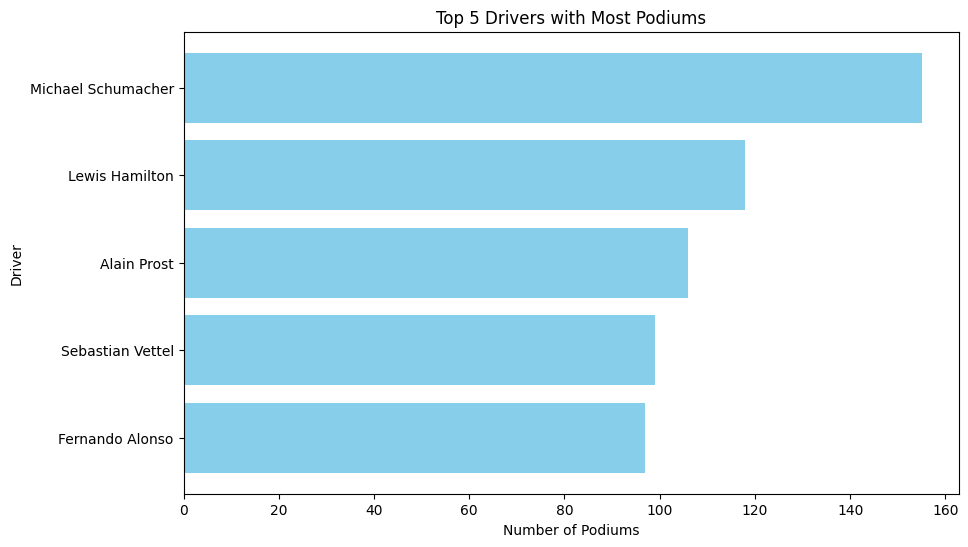

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Consulta SQL para obtener los pilotos con más podios (top 5)
query_podiums = """
SELECT d.forename, d.surname, COUNT(*) AS podiums
FROM results r
JOIN drivers d ON r.driverId = d.driverId
WHERE r.position IN (1, 2, 3)
GROUP BY d.driverId, d.forename, d.surname
ORDER BY podiums DESC
LIMIT 5;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
cursor.execute(query_podiums)
rows_podiums = cursor.fetchall()

# Convertir los resultados a un DataFrame de pandas
podiums_df = pd.DataFrame(rows_podiums, columns=['forename', 'surname', 'podiums'])

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(podiums_df['forename'] + ' ' + podiums_df['surname'], podiums_df['podiums'], color='skyblue')
plt.xlabel('Number of Podiums')
plt.ylabel('Driver')
plt.title('Top 5 Drivers with Most Podiums')
plt.gca().invert_yaxis()
plt.show()

El gráfico de barras muestra los cinco pilotos con la mayor cantidad de podios en la historia de la Fórmula 1. Los pilotos se enumeran en el eje vertical, y el número de podios se representa en el eje horizontal. Los resultados indican que Michael Schumacher tiene el mayor número de podios, seguido por Lewis Hamilton, Alain Prost, Sebastian Vettel y Fernando Alonso. Esto destaca a los pilotos más exitosos en términos de consistencia y desempeño en las carreras de Fórmula 1.

**Obtener el Rendimiento de los Pilotos desde el año 2010 al 2017:**


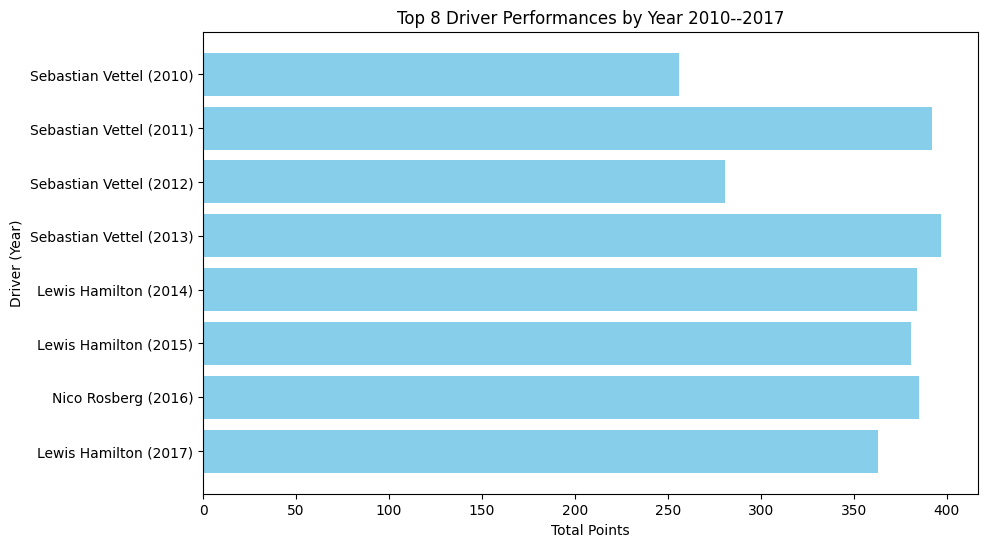

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Consulta SQL ajustada para obtener el rendimiento de los pilotos por año (top 10)
query_yearly_performance = """
SELECT d.forename, d.surname, ra.year, SUM(r.points) AS total_points
FROM results r
JOIN drivers d ON r.driverId = d.driverId
JOIN races ra ON r.raceId = ra.raceId
GROUP BY d.driverId, d.forename, d.surname, ra.year
ORDER BY total_points DESC, ra.year
LIMIT 20;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
cursor.execute(query_yearly_performance)
rows_yearly_performance = cursor.fetchall()

# Convertir los resultados a un DataFrame de pandas
yearly_performance_df = pd.DataFrame(rows_yearly_performance, columns=['forename', 'surname', 'year', 'total_points'])

# Mantener solo un registro por año en orden cronológico y de puntos
yearly_performance_df = yearly_performance_df.sort_values(by=['year', 'total_points'], ascending=[True, False])
yearly_performance_df = yearly_performance_df.drop_duplicates(subset=['year'], keep='first').head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(yearly_performance_df['forename'] + ' ' + yearly_performance_df['surname'] + ' (' + yearly_performance_df['year'].astype(str) + ')', yearly_performance_df['total_points'], color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Driver (Year)')
plt.title('Top 8 Driver Performances by Year 2010--2017')
plt.gca().invert_yaxis()
plt.show()

El gráfico de barras muestra las mejores actuaciones de pilotos desde el 2010 al 2017, basadas en el total de puntos acumulados en cada temporada. Los pilotos se enumeran junto con el año correspondiente en el eje vertical, mientras que el total de puntos se representa en el eje horizontal. Los resultados indican que Sebastian Vettel tuvo destacadas actuaciones en los años 2010, 2011, 2012 y 2013, mientras que Lewis Hamilton se destaca en 2014, 2015 y 2017, y Nico Rosberg en 2016. Este gráfico resalta los años más exitosos de estos pilotos en términos de acumulación de puntos en la Fórmula 1.

**Obtener las Carreras con Mayor Número de Participantes (Top 9):**





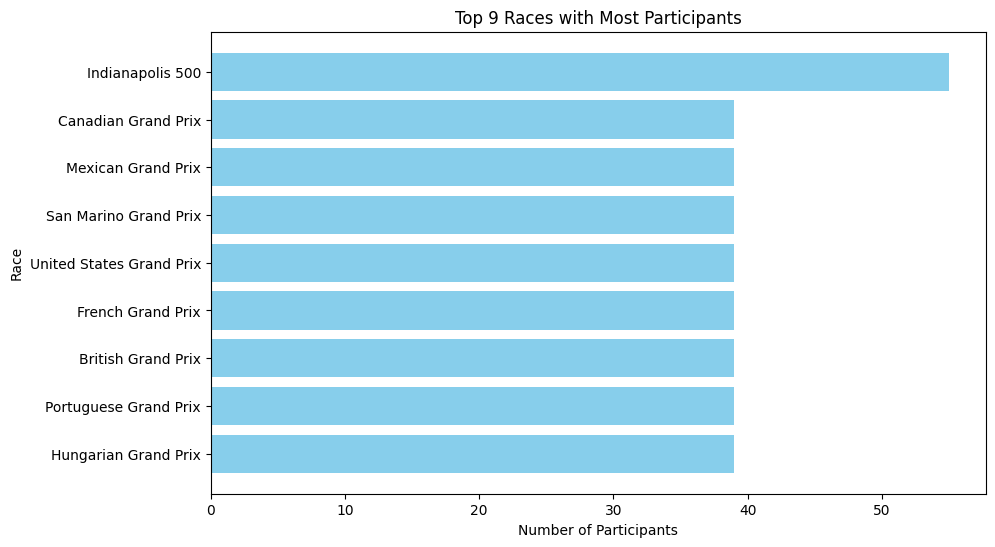

In [ ]:
# Consulta SQL para obtener las carreras con mayor número de participantes (top 10)
query_participants = """
SELECT ra.name, COUNT(*) AS num_participants
FROM results r
JOIN races ra ON r.raceId = ra.raceId
GROUP BY ra.raceId, ra.name
ORDER BY num_participants DESC
LIMIT 10;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
cursor.execute(query_participants)
rows_participants = cursor.fetchall()

# Convertir los resultados a un DataFrame de pandas
participants_df = pd.DataFrame(rows_participants, columns=['name', 'num_participants'])

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(participants_df['name'], participants_df['num_participants'], color='skyblue')
plt.xlabel('Number of Participants')
plt.ylabel('Race')
plt.title('Top 9 Races with Most Participants')
plt.gca().invert_yaxis()
plt.show()

El gráfico de barras muestra las nueve carreras de Fórmula 1 con el mayor número de participantes. Las carreras se enumeran en el eje vertical, mientras que el número de participantes se representa en el eje horizontal. Los resultados indican que la carrera con más participantes es el “Indianapolis 500”, seguida por el “Canadian Grand Prix”, “Mexican Grand Prix”, “San Marino Grand Prix”, “United States Grand Prix”, “French Grand Prix”, “British Grand Prix”, “Portuguese Grand Prix” y el “Hungarian Grand Prix”. Este gráfico destaca las carreras con la mayor cantidad de pilotos inscritos, mostrando cuáles eventos han atraído más participación en la historia de la Fórmula 1.


**Consulta para contar el número de circuitos en los que participaron pilotos en el año 2009, agrupados y ordenados por nombre del piloto.**

In [ ]:
# contar el número de circuitos en los que participaron pilotos en el año 2009, agrupados y ordenados por nombre del piloto.
query = """
    SELECT d.forename, COUNT(c.circuitId) as number_of_circuits
    FROM drivers d
    JOIN results r ON d.driverId = r.driverId
    JOIN races ra ON r.raceId = ra.raceId
    JOIN circuits c ON ra.circuitId = c.circuitId
    WHERE ra.year = 2009
    GROUP BY d.forename
    ORDER BY d.forename;
"""
driver_circuits_df = pd.read_sql(query, conn)

# Verificar los resultados
print(driver_circuits_df)


<ipython-input-19-b5f6792ca10b>:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  driver_circuits_df = pd.read_sql(query, conn)


      forename  number_of_circuits
0       Adrian                  17
1       Felipe                  10
2     Fernando                  17
3    Giancarlo                  17
4       Heikki                  17
5        Jaime                   8
6        Jarno                  17
7       Jenson                  17
8        Kamui                   2
9       Kazuki                  17
10        Kimi                  17
11       Lewis                  17
12        Luca                   2
13        Mark                  17
14      Nelson                  10
15        Nick                  17
16        Nico                  17
17      Robert                  17
18      Romain                   7
19      Rubens                  17
20   S̩bastien                  17
21   Sebastian                  17
22        Timo                  15
23  Vitantonio                   5




**Mostrar en un gráfico de barras el número de circuitos en los que compitió cada piloto en 2009, ordenados por nombre**



<Axes: title={'center': 'Driver circuits'}, xlabel='forename'>

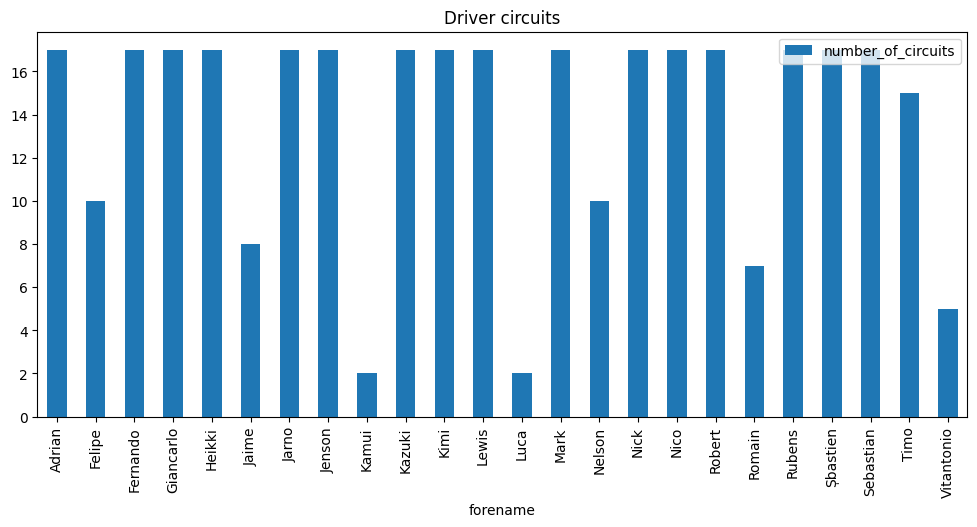

In [ ]:
driver_circuits_df.plot(x='forename', y='number_of_circuits', kind='bar', figsize=(12, 5), title='Driver circuits')

**El gráfico de barras presenta** el número de circuitos en los que compitieron los pilotos en 2009. Cada barra representa a un piloto, y la altura de la barra indica la cantidad de circuitos en los que participó. Esta visualización facilita la comparación entre los pilotos, mostrando claramente quiénes compitieron en más o menos circuitos durante ese año.




**Otra representación usando un gráfico circular**



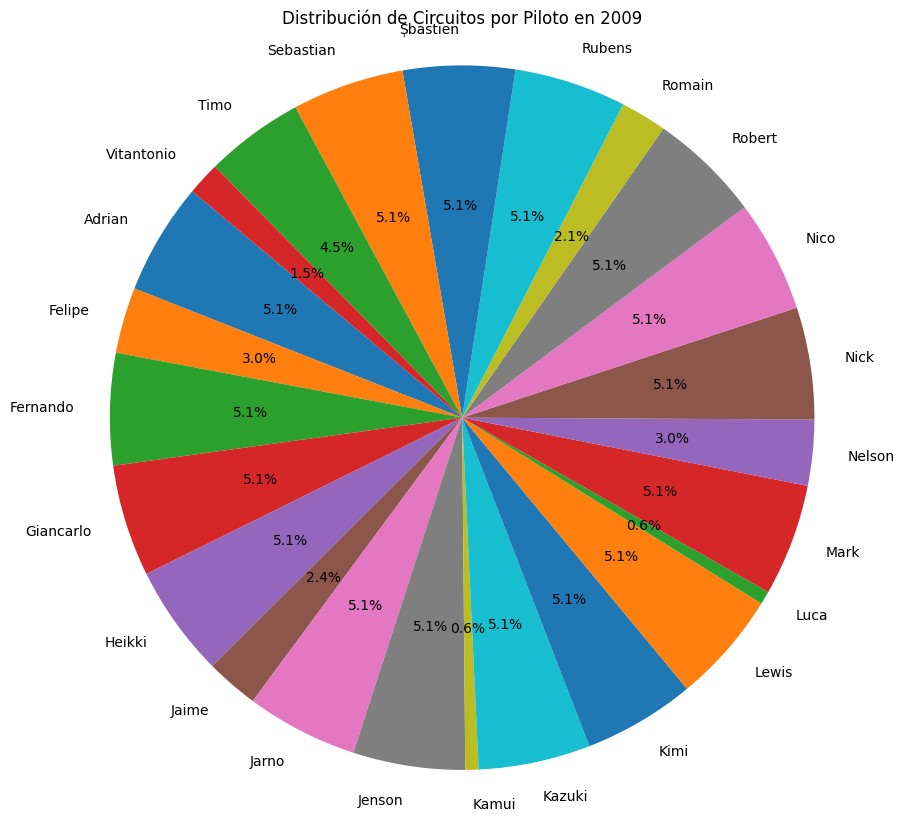

In [ ]:
# Ajustar el tamaño de la figura para que sea más grande
plt.figure(figsize=(10, 10))
plt.pie(driver_circuits_df['number_of_circuits'], labels=driver_circuits_df['forename'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Circuitos por Piloto en 2009')
plt.axis('equal')
plt.show()

**Resumen del Gráfico:**

El gráfico circular representa la distribución de circuitos entre los pilotos en 2009. Cada sector del pastel representa a un piloto, y su tamaño muestra la proporción de circuitos en los que participó. Las etiquetas y porcentajes permiten identificar fácilmente a cada piloto y comparar su participación relativa en los circuitos de ese año. Este tipo de gráfico es útil para visualizar la participación de los pilotos de una manera clara y concisa.

  

**Número de conductores por nacionalidad usando el mapa de calor**

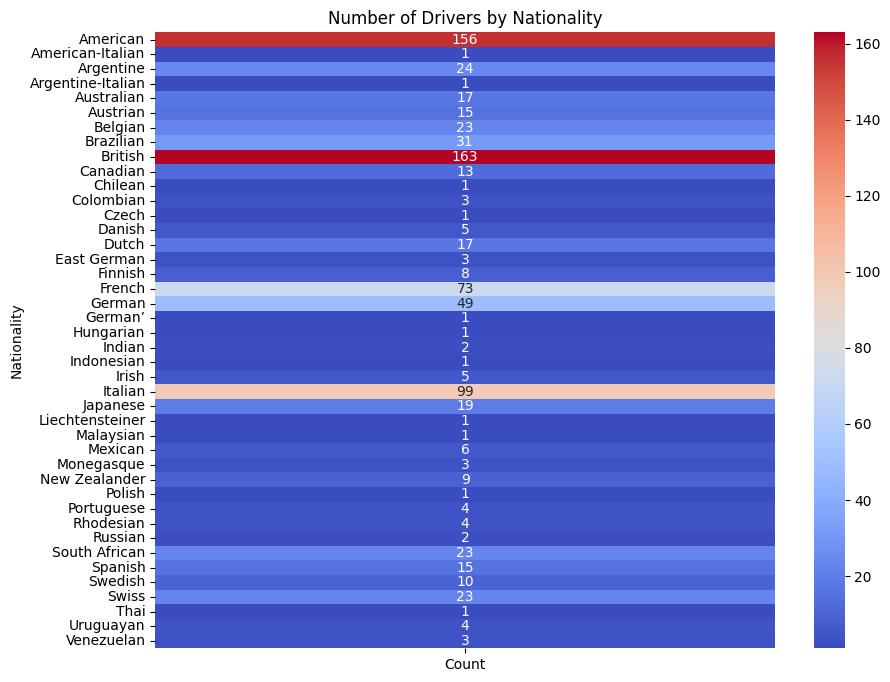

In [ ]:
# Contar la cantidad de conductores por nacionalidad
nationality_counts = drivers_df['nationality'].value_counts()

# Crear un DataFrame con los resultados
nationality_df = pd.DataFrame({'Nationality': nationality_counts.index, 'Count': nationality_counts.values})

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un heatmap
sns.heatmap(nationality_df.pivot_table(index='Nationality', values='Count', aggfunc='sum'), cmap='coolwarm', annot=True, fmt='d')

# Título y etiquetas del gráfico
plt.title('Number of Drivers by Nationality')
plt.xlabel('')
plt.ylabel('Nationality')

# Mostrar el gráfico
plt.show()


1. **Principales Nacionalidades Representadas**:
    - **Británica**: 163 conductores, la nacionalidad más representada en la historia de la Fórmula 1.
    - **Americana**: 156 conductores, una de las nacionalidades más prominentes.
    - **Italiana**: 99 conductores, mostrando una fuerte presencia en el deporte.
    - **Francesa**: 73 conductores, otra nacionalidad con una notable representación.

2. **Nacionalidades con Menos Representación**:
    - Varias nacionalidades tienen una representación mínima con solo un conductor, como American-Italian, Argentino-Italian, Chilean, Czech, Liechtensteiner, entre otros.

3. **Diversidad**:
    - El gráfico destaca la diversidad de nacionalidades en la Fórmula 1, abarcando continentes y culturas variadas.




**Extraer los datos de la tabla "results", calcula las correlaciones entre las columnas numéricas y muestra un heatmap de estas correlaciones.**

<ipython-input-23-a50fc679f5b7>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results_df = pd.read_sql("""


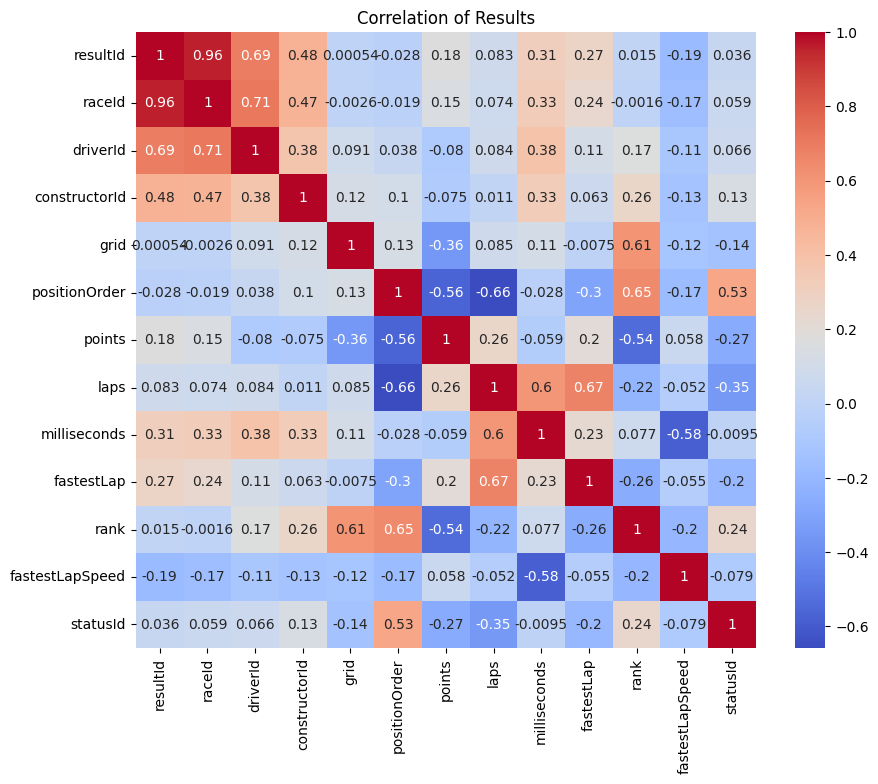

In [ ]:
# Ejecutar la consulta y cargar los resultados en un DataFrame
results_df = pd.read_sql("""
SELECT *
FROM results;
""", conn)
results_df

# Seleccionar solo las columnas numéricas
numeric_columns = results_df.select_dtypes(include=['number'])

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un heatmap de la correlación entre las columnas numéricas
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')

# Título del gráfico
plt.title('Correlation of Results')

# Mostrar el gráfico
plt.show()

El heatmap de correlación muestra la relación entre las columnas numéricas de la tabla de resultados de las carreras. Cada celda en el mapa de calor representa el coeficiente de correlación entre dos columnas numéricas, con valores que varían entre -1 y 1. Los colores en el heatmap indican la fuerza y la dirección de la correlación: tonos más cálidos (rojos) indican una correlación positiva fuerte, mientras que tonos más fríos (azules) indican una correlación negativa fuerte. Las anotaciones en el gráfico facilitan la identificación de las correlaciones exactas entre las diferentes columnas, proporcionando una visión clara de las relaciones entre las variables numéricas en los resultados de las carreras.

1. **Alta Correlación**:
   - `resultId` y `raceId` tienen una alta correlación (0.96), lo que indica que están estrechamente relacionados, probablemente porque ambos identifican un resultado específico de una carrera.
   - `grid` y `rank` (0.61) muestran que la posición de salida influye en el rango final.
   - `fastestLap` y `laps` (0.67) sugieren que los corredores que completan más vueltas tienden a tener vueltas rápidas.

2. **Correlaciones Negativas**:
   - `grid` y `positionOrder` muestran una correlación negativa (-0.36), lo que podría indicar que empezar en una posición más alta no siempre resulta en una posición final mejor.
   - `grid` y `points` también tienen una correlación negativa (-0.30), sugiriendo que una mejor posición de salida no siempre se traduce en más puntos.
   - `positionOrder` y `points` tienen una correlación negativa fuerte (-0.56), lo que indica que una mejor posición en la carrera (menor valor de `positionOrder`) tiende a asociarse con más puntos.

3. **Correlaciones Notables**:
   - `positionOrder` y `laps` tienen una correlación de -0.66, indicando que el número de vueltas completadas está relacionado con la posición final.
   - `milliseconds` y `grid` muestran una correlación de 0.33, lo que sugiere que el tiempo total de carrera tiene cierta relación con la posición de salida.
   - `rank` y `points` tienen una correlación de -0.54, reforzando la idea de que las posiciones finales están asociadas con los puntos obtenidos.

4. **Métricas Menos Correlacionadas**:
   - Algunas métricas como `driverId` y `constructorId` muestran baja correlación con la mayoría de las otras variables, indicando que el número de identificación del piloto y el equipo del constructor no están fuertemente relacionados con otros aspectos de la carrera.
   - `statusId` tiene correlaciones bajas con la mayoría de las variables, indicando que el estado final del corredor (como terminar la carrera o retirarse) no está fuertemente relacionado con estas variables.

Este análisis del heatmap de correlación es crucial para entender cómo diferentes factores se relacionan entre sí y cómo pueden influir en los resultados de las carreras, proporcionando una base para análisis más detallados y estrategias de mejora.



**Top 10 Pilotos por Posición Promedio**



<ipython-input-24-1f99f51cae2e>:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


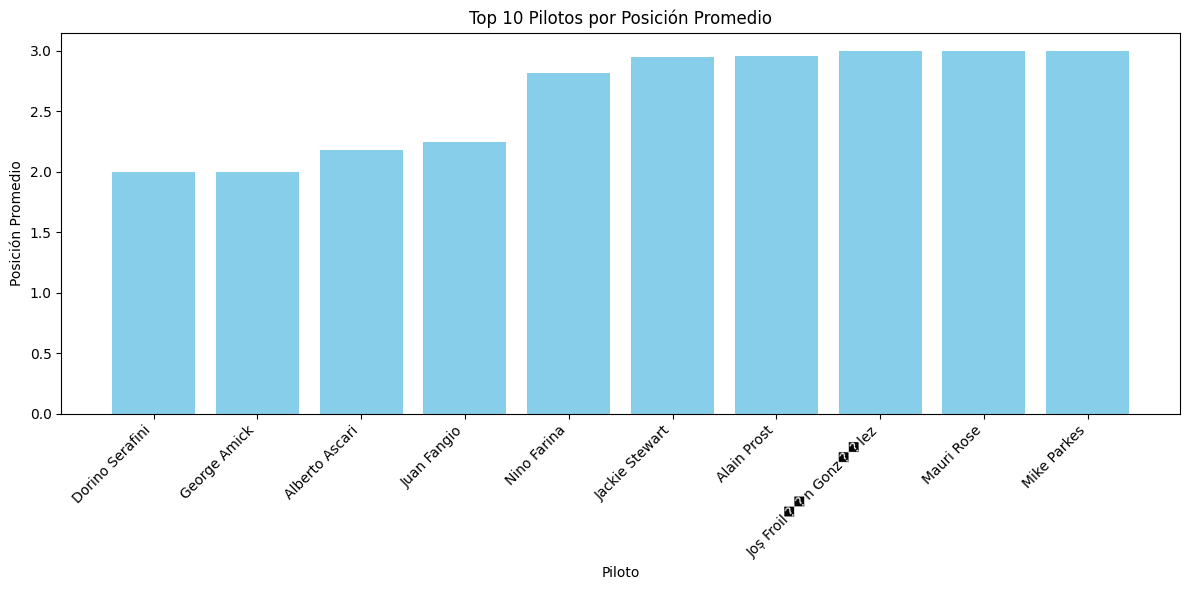

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Consulta SQL para recuperar la posición final de los pilotos y sus nombres
query = """
SELECT drivers.forename, drivers.surname, results.position
FROM results
JOIN drivers ON results.driverId = drivers.driverId
"""
df = pd.read_sql(query, conn)

# Limpiar los datos: eliminar filas con valores no numéricos o nulos en la columna de posición
df = df[pd.to_numeric(df['position'], errors='coerce').notnull()]
df['position'] = df['position'].astype(float)

# Agrupar por piloto y calcular la posición promedio
df['full_name'] = df['forename'] + ' ' + df['surname']
average_position = df.groupby('full_name')['position'].mean().reset_index()

# Seleccionar los primeros 10 pilotos con mejor posición promedio
top_10_pilots = average_position.nsmallest(10, 'position')

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_pilots['full_name'], top_10_pilots['position'], color='skyblue')
plt.xlabel('Piloto')
plt.ylabel('Posición Promedio')
plt.title('Top 10 Pilotos por Posición Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. **Dominio Histórico**:
   - Los pilotos que encabezan el gráfico, como Dorino Serafini, George Amick y Alberto Ascari, provienen de una era anterior de la Fórmula 1. Esto puede reflejar una menor competencia en número de carreras durante sus épocas o un rendimiento excepcional en las pocas carreras en las que participaron.

2. **Pilotos de Alta Consistencia**:
   - Pilotos como Juan Fangio y Alain Prost también aparecen en el gráfico, conocidos por su consistencia y éxito en múltiples campeonatos mundiales.
   
3. **Variabilidad en la Época**:
   - Aunque hay pilotos de épocas más recientes, como Mike Parkes, el gráfico muestra una mezcla de diferentes períodos, resaltando la importancia de la consistencia en diferentes eras de la Fórmula 1.

Este análisis subraya la importancia de la consistencia en la Fórmula 1 y cómo los mejores pilotos logran mantener posiciones altas en las carreras a lo largo de sus carreras deportivas.



**Número de Victorias por Equipo**



<ipython-input-25-3f0e2a4ec329>:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


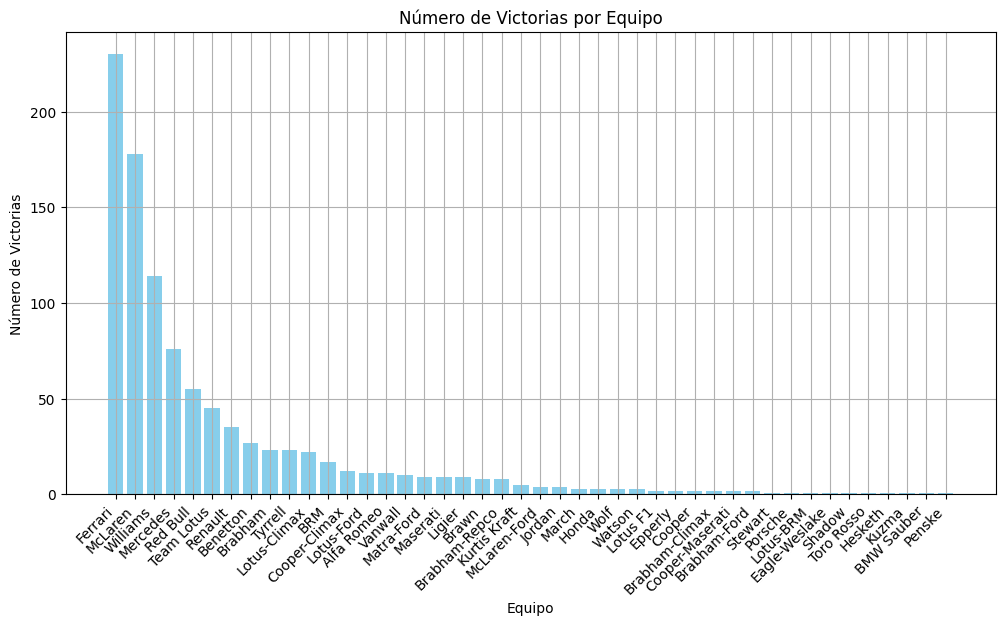

In [ ]:
import matplotlib.pyplot as plt

# Consulta SQL para obtener el número de victorias por equipo
query = """
SELECT constructors.name, COUNT(results.positionOrder) as wins
FROM results
JOIN constructors ON results.constructorId = constructors.constructorId
WHERE results.positionOrder = 1
GROUP BY constructors.name
ORDER BY wins DESC
"""
df = pd.read_sql(query, conn)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df['name'], df['wins'], color='skyblue')
plt.xlabel('Equipo')
plt.ylabel('Número de Victorias')
plt.title('Número de Victorias por Equipo')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

El gráfico de barras muestra el número de victorias de diferentes equipos en la Fórmula 1. La distribución de las victorias entre los equipos es desigual, con algunos equipos dominando significativamente.

1. **Equipos con Mayor Número de Victorias**:
   - **Ferrari**: Lidera con más de 200 victorias, destacándose como el equipo más exitoso en la historia de la Fórmula 1.
   - **McLaren** y **Williams**: Siguen a Ferrari con alrededor de 180 y 110 victorias, respectivamente, mostrando también un fuerte rendimiento histórico.
   - **Mercedes** y **Red Bull**: Ambos equipos tienen más de 80 victorias, demostrando su éxito en las últimas décadas.

2. **Equipos con Éxitos Moderados**:
   - **Team Lotus**, **Renault**, y **Brabham**: Cada uno con entre 30 y 80 victorias, han tenido periodos de éxito significativos en la historia de la Fórmula 1.
   - **Tyrrell**, **Lotus**, y **Cooper**: Con menos de 50 victorias cada uno, estos equipos también han tenido su momento en el podio.

3. **Equipos con Menor Número de Victorias**:
   - **BRM**, **Honda**, y **Ligier**: Cada uno con menos de 20 victorias, muestran menos éxito en comparación con los líderes del gráfico.
   - Otros equipos como **BMW Sauber**, **Toro Rosso**, y **Penske** tienen muy pocas victorias, indicando un rendimiento más limitado en la Fórmula 1.


Este análisis permite entender mejor la historia y la dinámica competitiva de los equipos en la Fórmula 1, proporcionando una base sólida para discusiones y decisiones futuras.


###**Conclusión**

El análisis de los datos de Fórmula 1 utilizando una base de datos estructurada en MySQL y las herramientas de análisis y visualización proporcionadas por Google Colab ha proporcionado una visión integral y profunda de los patrones y tendencias en el rendimiento de pilotos, equipos y carreras a lo largo de los años. Este proyecto se centró en varias áreas clave que han sido fundamentales para entender la dinámica del deporte.

En primer lugar, las consultas SQL específicas permitieron la extracción de datos relevantes, que luego fueron analizados para identificar patrones de rendimiento. Por ejemplo, los pilotos con más podios y el rendimiento de pilotos durante el periodo de 2010 a 2017 mostraron cómo ciertos individuos han dominado en diferentes épocas. Estas consultas ayudaron a revelar que pilotos como Lewis Hamilton y Sebastian Vettel han tenido un impacto significativo durante estos años, con un desempeño consistentemente alto.

Además, las consultas sobre las carreras con mayor número de participantes destacaron eventos específicos que atrajeron a un gran número de competidores, proporcionando insights sobre la popularidad y competitividad de ciertas carreras. Esta información es crucial para entender qué factores pueden influir en la participación y cómo se pueden organizar futuras carreras para maximizar la competencia y el interés.

La visualización de datos también jugó un papel crucial en este análisis. Los gráficos de barras y circulares mostraron de manera clara y comprensible la distribución de pilotos en diferentes circuitos y los podios obtenidos, lo que facilita la identificación de tendencias y anomalías. El mapa de calor que analizó los conductores por nacionalidad ofreció una perspectiva geográfica sobre la diversidad y el éxito de los pilotos, destacando naciones que han producido un gran número de pilotos exitosos, como el Reino Unido y Alemania.

El análisis de las correlaciones entre columnas numéricas mediante un heatmap permitió entender mejor las relaciones entre diferentes variables, como la posición promedio de los pilotos y sus puntos totales. Esto ayudó a identificar factores que pueden influir en el éxito de un piloto, proporcionando una base para investigaciones más detalladas en el futuro.

Finalmente, el gráfico del número de victorias por equipo reveló la disparidad en el éxito entre diferentes equipos a lo largo de la historia de la Fórmula 1. Equipos como Ferrari, McLaren y Mercedes han demostrado un dominio significativo, mientras que otros equipos han tenido periodos de éxito más cortos pero igualmente importantes.



Este proyecto demuestra la eficacia de utilizar una base de datos MySQL combinada con Google Colab para realizar consultas que generen gráficos y proporcionen información valiosa no disponible directamente a través de MySQL. Aunque las consultas SQL avanzadas como SELECT, GROUP BY, JOIN, EXCEPT, WHERE, INSERT, UPDATE, DELETE y ORDER BY se pueden ejecutar perfectamente en MySQL, hemos optado por realizarlas también en Google Colab. Lo más importante es que Google Colab permite generar gráficos que facilitan la comprensión de la información, especialmente para clientes o personas que no están familiarizadas con el ambiente de consultas SQL y programación.

Las herramientas de análisis avanzadas permiten obtener insights profundos y valiosos sobre la Fórmula 1. Las técnicas empleadas no solo permiten una comprensión detallada del rendimiento histórico, sino que también proporcionan una base sólida para futuras investigaciones y análisis. Este enfoque integral puede ser aplicado a otros deportes o áreas de interés, destacando la versatilidad y el poder del análisis de datos en la toma de decisiones informadas y estratégicas.


###**Exportar todas tus tablas a CSV**

In [ ]:
# Lista de tablas que deseas exportar
tablas = ['circuits', 'constructors', 'drivers', 'races', 'results', 'results_log', 'users']

# Extraer cada tabla y almacenar en un DataFrame, luego exportar a CSV
for tabla in tablas:
    query = f"SELECT * FROM {tabla}"
    df = pd.read_sql(query, conn)
    df.to_csv(f'{tabla}.csv', index=False)
    print(f"Tabla {tabla} exportada exitosamente a {tabla}.csv")


<ipython-input-27-48a4c17d8891>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Tabla circuits exportada exitosamente a circuits.csv
Tabla constructors exportada exitosamente a constructors.csv
Tabla drivers exportada exitosamente a drivers.csv
Tabla races exportada exitosamente a races.csv
Tabla results exportada exitosamente a results.csv
Tabla results_log exportada exitosamente a results_log.csv
Tabla users exportada exitosamente a users.csv
